In [1]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split


In [2]:
newCleanerSurveyFile='../datasets/new_hh_clean_w_survey.csv'
cleanSurvey_df=pd.read_csv(newCleanerSurveyFile)
cleanSurvey_df.head()

,Unnamed: 0,Unnamed: 0.1,Year,Provider ID,Agency Name,Street Address,City,State,Zip Code,Total Episodes (non-LUPA),...,Percent of Beneficiaries with Diabetes,Percent of Beneficiaries with Hyperlipidemia,Percent of Beneficiaries with IHD,Percent of Beneficiaries with Osteoporosis,Percent of Beneficiaries with RA/OA,Percent of Beneficiaries with Schizophrenia,Percent of Beneficiaries with Stroke,risk_categorical,CMS Certification Number (CCN),Star Rating for how patients rated overall care from agency
0,0,1,2016,17009,0,0,BIRMINGHAM,AL,35216,12879,...,0.4512,0.6743,0.5644,0.1329,0.6463,0.0523,0.1276,2,17009,4
1,1,10140,2015,17009,0,0,BIRMINGHAM,AL,35216,12948,...,0.4600,0.6400,0.5700,0.1400,0.6100,0.0800,0.1300,2,17009,4
2,2,20666,2014,17009,0,0,BIRMINGHAM,AL,35216,11823,...,0.4500,0.6300,0.5700,0.1500,0.6100,0.0900,0.1300,2,17009,4
3,3,31533,2013,17009,0,0,BIRMINGHAM,AL,35216,12012,...,0.4500,0.6200,0.5700,0.1500,0.5900,0.0900,0.1400,2,17009,4
4,4,2,2016,17013,0,0,ENTERPRISE,AL,36330,1236,...,0.4526,0.6618,0.5114,0.1650,0.6716,0.0523,0.1275,2,17013,4


In [6]:
cleanSurvey_df.count().head()

Unnamed: 0      21508
Unnamed: 0.1    21508
Year            21508
Provider ID     21508
Agency Name     21508
dtype: int64

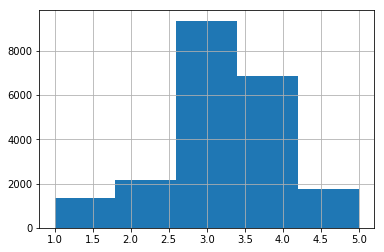

In [18]:
cleanSurvey_df['Star Rating for how patients rated overall care from agency'].hist(bins=5)

In [19]:
cleanSurvey_df['Star Rating for how patients rated overall care from agency'].describe()

count    21508.000000
mean         3.256974
std          0.967859
min          1.000000
25%          3.000000
50%          3.000000
75%          4.000000
max          5.000000
Name: Star Rating for how patients rated overall care from agency, dtype: float64

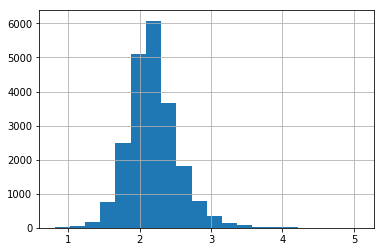

In [13]:
cleanSurvey_df['Average HCC Score'].hist(bins=20)

In [20]:
cleanSurvey_df['Average HCC Score'].describe()

count    21508.000000
mean         2.186107
std          0.349181
min          0.810000
25%          1.960000
50%          2.160000
75%          2.380000
max          5.070000
Name: Average HCC Score, dtype: float64

In [54]:
theHCC =cleanSurvey_df['Average HCC Score']
satisfaction=cleanSurvey_df['Star Rating for how patients rated overall care from agency'].values.reshape(-1,1)

In [55]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(
    satisfaction,
    theHCC,
    test_size=0.2,
    random_state=1
)
print('Training set has {} samples.'.format(X_train.shape[0]))
print('Testing set has {} samples'.format(X_test.shape[0]))

Training set has 17206 samples.
Testing set has 4302 samples


In [56]:
from sklearn.preprocessing import StandardScaler
X_scaler = StandardScaler().fit(X_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


In [64]:
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


In [65]:
from keras.models import Sequential
model = Sequential()

In [66]:
from keras.layers import Dense
model.add(Dense(units=6,activation='relu',input_dim=1))
model.add(Dense(units=6,activation='relu'))

In [67]:
model.add(Dense(units=1,activation='linear'))

In [68]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_7 (Dense)              (None, 6)                 12        
_________________________________________________________________
dense_8 (Dense)              (None, 6)                 42        
_________________________________________________________________
dense_9 (Dense)              (None, 1)                 7         
Total params: 61
Trainable params: 61
Non-trainable params: 0
_________________________________________________________________


In [69]:
model.compile(optimizer='adam', loss='mse')

In [70]:
model.fit(
    X_train_scaled,
    y_train,
    epochs=100,
    shuffle=True,
    verbose=2
)

Epoch 1/100
 - 1s - loss: 1.5491
Epoch 2/100
 - 0s - loss: 0.1498
Epoch 3/100
 - 0s - loss: 0.1215
Epoch 4/100
 - 0s - loss: 0.1202
Epoch 5/100
 - 0s - loss: 0.1196
Epoch 6/100
 - 0s - loss: 0.1193
Epoch 7/100
 - 0s - loss: 0.1190
Epoch 8/100
 - 0s - loss: 0.1189
Epoch 9/100
 - 0s - loss: 0.1188
Epoch 10/100
 - 0s - loss: 0.1188
Epoch 11/100
 - 0s - loss: 0.1188
Epoch 12/100
 - 0s - loss: 0.1188
Epoch 13/100
 - 0s - loss: 0.1188
Epoch 14/100
 - 0s - loss: 0.1188
Epoch 15/100
 - 0s - loss: 0.1189
Epoch 16/100
 - 0s - loss: 0.1189
Epoch 17/100
 - 0s - loss: 0.1188
Epoch 18/100
 - 0s - loss: 0.1187
Epoch 19/100
 - 0s - loss: 0.1189
Epoch 20/100
 - 0s - loss: 0.1190
Epoch 21/100
 - 0s - loss: 0.1189
Epoch 22/100
 - 0s - loss: 0.1188
Epoch 23/100
 - 0s - loss: 0.1188
Epoch 24/100
 - 0s - loss: 0.1188
Epoch 25/100
 - 0s - loss: 0.1188
Epoch 26/100
 - 0s - loss: 0.1190
Epoch 27/100
 - 0s - loss: 0.1187
Epoch 28/100
 - 0s - loss: 0.1190
Epoch 29/100
 - 0s - loss: 0.1188
Epoch 30/100
 - 0s - lo

In [71]:
model_loss =model.evaluate(
    X_test_scaled,
    y_test,
    verbose=2
)
print(f'Loss: {model_loss}')

Loss: 0.11599099435871671


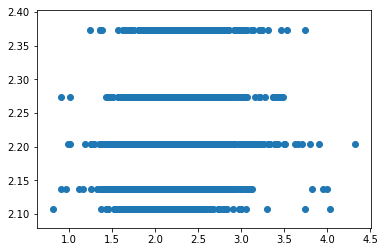

In [85]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.scatter(y_test,model.predict(X_test_scaled))
plt.ylim=(0,5)